In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C:/Users/nayak/OneDrive/Desktop/DATASETS/retail_sales_dataset.csv')
# input retail dataset from device

In [3]:
print("Dimension of the dataset:", df.shape)
print("Size of the dataset: ", df.size)
print("Columns in the dataset: ", df.keys())

#extract properties of the dataset

Dimension of the dataset: (1000, 9)
Size of the dataset:  9000
Columns in the dataset:  Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [4]:
print("Information of the dataset: \n",df.info())
print("After removing duplicates: \n",df.drop_duplicates(inplace=True)) 
print("Size of the dataset after removing duplicates: \n",df.size)
 
#cleaning the data by checking the duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
Information of the dataset: 
 None
After removing duplicates: 
 None
Size of the dataset after removing duplicates: 
 9000


In [5]:
df.describe()

#DESCRIPTIVE STATS

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
print(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode())

#finding mode of the ages ie- customer's age that occurs the most in the data

   Age  Quantity  Price per Unit  Total Amount
0   43       4.0            50.0          50.0
1   64       NaN             NaN           NaN


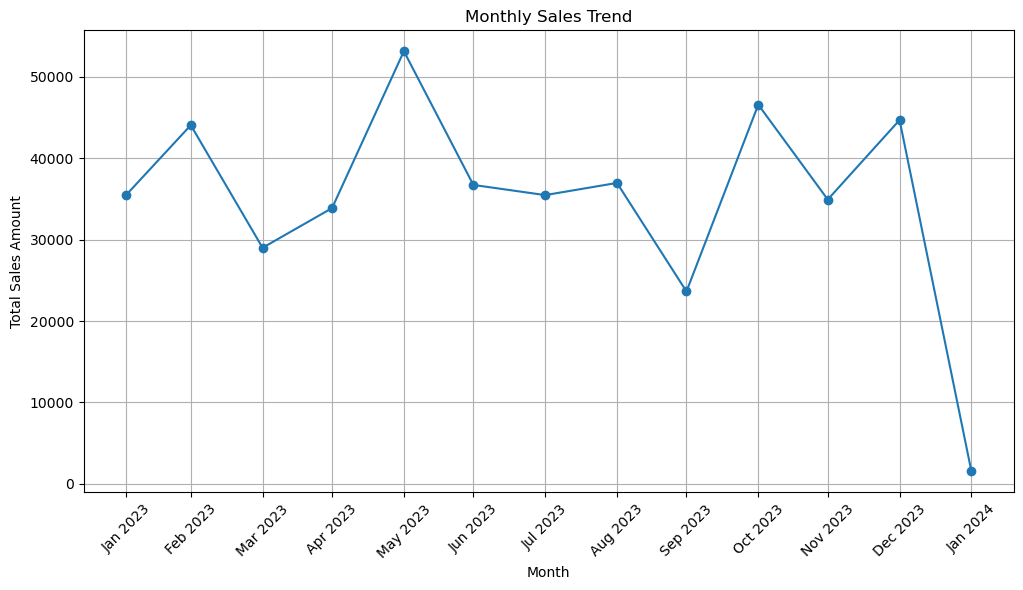

In [7]:
df['Date']=pd.to_datetime(df['Date'])
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=45)
plt.grid(True)
plt.show()

# a time series plot that denotes the trends based on total amount of sales in the store

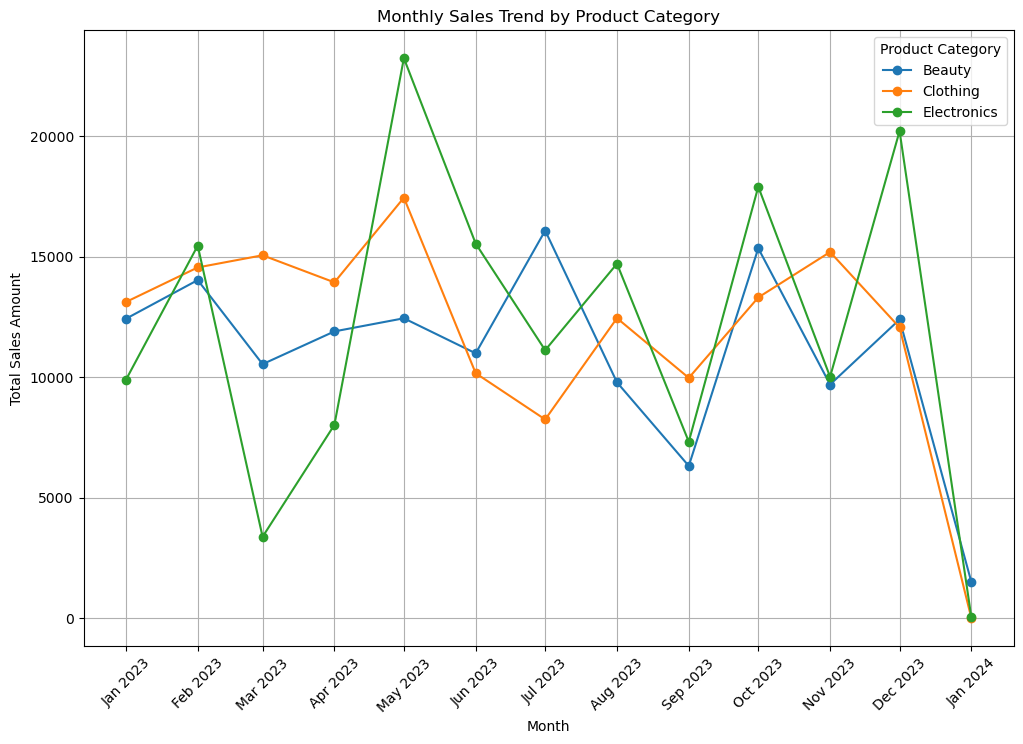

In [8]:
monthly_category_sales = df.groupby([df['Date'].dt.to_period('M'),
                                        'Product Category'])['Total Amount'].sum().reset_index()
pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category',
                                            values='Total Amount').fillna(0)

plt.figure(figsize=(12, 8))
for category in pivot_table.columns:
    plt.plot(pivot_table.index.to_timestamp(),
             pivot_table[category],
             marker='o', label=category)  # Convert index to timestamp for better plotting

plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(ticks=pivot_table.index.to_timestamp(),
           labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()],
           rotation=45)  # Convert index to timestamp and format the labels
plt.show()

# time series plot that shows how much sales a product category brings in for the store 

Month-on-month trend indicates Clothing sales going downwards hence something needs to be done about it. 
Also the sales slump in the month of September needs to be closely investigated and proper action should be taken.
The month of May especially the date of 16th May is the sales leader across the months with electronics dominating the sales.
Hence to maximize the revenue during that period or date further opportunity to market the Electronic products can be explored followed by the Clothing products.

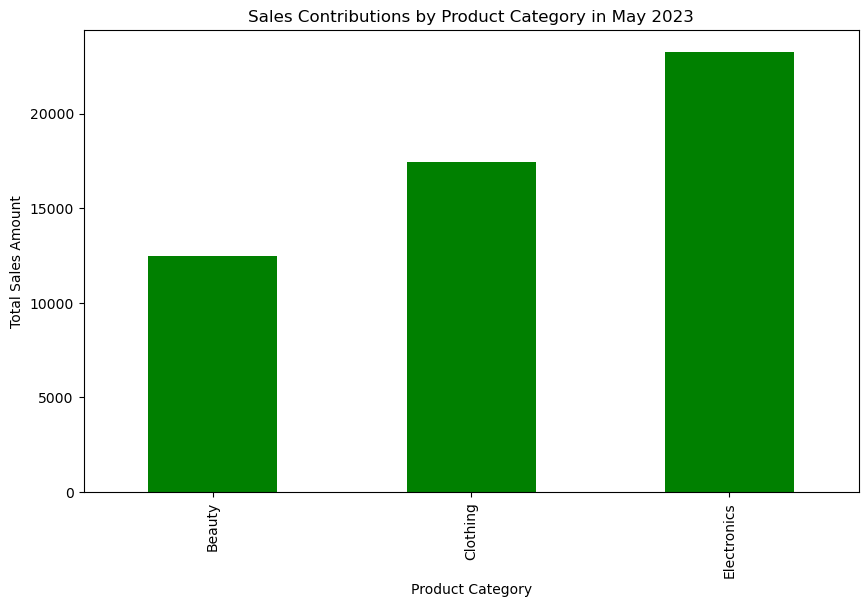

The total sales in the month of May is: 53150


In [9]:
start_date = '2023-05-01'
end_date = '2023-05-31'
data_may = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

cat_sales_highest_month = data_may.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
cat_sales_highest_month.plot(kind='bar', color='green')
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_may = data_may['Total Amount'].sum()
print(f'The total sales in the month of May is: {total_sales_may}')

#a bar plot that shows which product category brings in the most sales

Electronics was sold the most in the MOST sold month.

In [10]:
date_count = df['Date'].groupby(df['Date']).count()
max_count_date = date_count.idxmax()
print(f"The date with the highest number of transactions is {max_count_date} with {date_count[max_count_date]} transactions.")

# calculates highest number of transactions on which date

The date with the highest number of transactions is 2023-05-16 00:00:00 with 11 transactions.


Text(0.5, 1.0, 'Number of Transactions by Day')

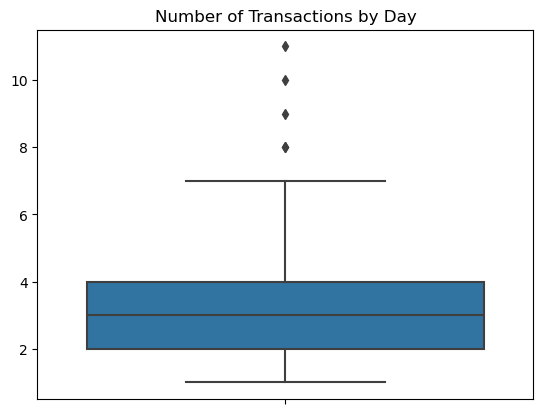

In [11]:
sns.boxplot(y=date_count.values).set_title('Number of Transactions by Day')

From the above Boxplot, it is evident that the most common number of transactions is between 2-4, however from the previous code, the maximum no. of transactions was 11 on 16th May,2023 thus is an outlier in this plot.

<Axes: >

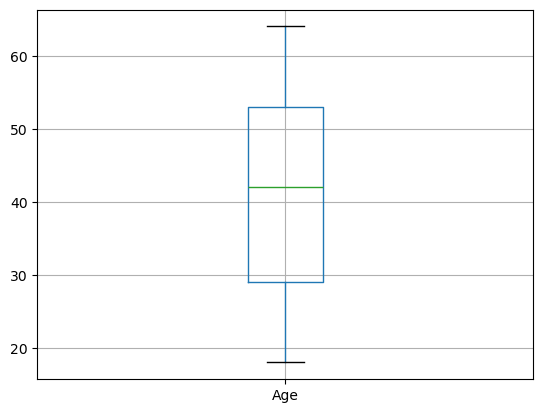

In [12]:
df.boxplot(column='Age',showfliers=True)
#boxplot for denoting age distribution

The shoppers age distribution mostly lies between 29 and 53.

In [13]:
print("Number of records based on gender in percentage: ",df['Gender'].value_counts()/len(df['Gender']))

#Number of transactions between male and female are evenly distributed, signifying that there is no gender preference observed in the purchasing history for the retail outlet.

Number of records based on gender in percentage:  Gender
Female    0.51
Male      0.49
Name: count, dtype: float64


<Axes: xlabel='Gender'>

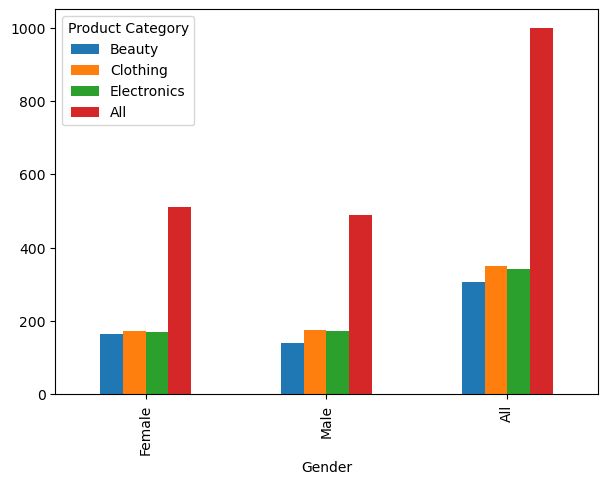

In [14]:
pd.crosstab(df['Gender'],
            df['Product Category'],
            margins=True).plot(kind='bar',figsize=(7,5))

In [15]:
# Group by month (extract month from 'Date' column)
monthly_transactions = df.groupby(df['Date'].dt.month)

# Analyze data using vectorized operations
def analyze_month(group):
  """Analyzes data for a single month group."""
  # Most bought category
  most_bought_category = group['Product Category'].mode().iloc[0]
  # Number of customers (unique IDs)
  num_customers = group['Customer ID'].nunique()
  # Gender counts
  gender_counts = group['Gender'].value_counts()
  # Total spending
  total_spending = group['Total Amount'].sum()
  
  # Print results
  print(f"Month: {group.name}")
  print(f"  Most bought Product Category: {most_bought_category}")
  print(f"  Number of Customers: {num_customers}")
  if 'Male' in gender_counts:
    print(f"    Male Customers: {gender_counts['Male']}")
  if 'Female' in gender_counts:
    print(f"    Female Customers: {gender_counts['Female']}")
  print(f"  Total spending on all Product Categories: {total_spending:.2f}")
  print()  # Add a blank line between months

# Apply analysis function to each month group
monthly_transactions.apply(analyze_month)

Month: 1
  Most bought Product Category: Beauty
  Number of Customers: 78
    Male Customers: 38
    Female Customers: 40
  Total spending on all Product Categories: 36980.00

Month: 2
  Most bought Product Category: Clothing
  Number of Customers: 85
    Male Customers: 49
    Female Customers: 36
  Total spending on all Product Categories: 44060.00

Month: 3
  Most bought Product Category: Clothing
  Number of Customers: 73
    Male Customers: 32
    Female Customers: 41
  Total spending on all Product Categories: 28990.00

Month: 4
  Most bought Product Category: Clothing
  Number of Customers: 86
    Male Customers: 36
    Female Customers: 50
  Total spending on all Product Categories: 33870.00

Month: 5
  Most bought Product Category: Electronics
  Number of Customers: 105
    Male Customers: 60
    Female Customers: 45
  Total spending on all Product Categories: 53150.00

Month: 6
  Most bought Product Category: Clothing
  Number of Customers: 77
    Male Customers: 38
    Femal

""


Month: 1
  Male Spending: 12255.00
  Female Spending: 24725.00

Month: 2
  Male Spending: 29665.00
  Female Spending: 14395.00

Month: 3
  Male Spending: 15670.00
  Female Spending: 13320.00

Month: 4
  Male Spending: 16570.00
  Female Spending: 17300.00

Month: 5
  Male Spending: 29220.00
  Female Spending: 23930.00

Month: 6
  Male Spending: 19840.00
  Female Spending: 16875.00

Month: 7
  Male Spending: 18580.00
  Female Spending: 16885.00

Month: 8
  Male Spending: 14880.00
  Female Spending: 22080.00

Month: 9
  Male Spending: 7085.00
  Female Spending: 16535.00

Month: 10
  Male Spending: 19980.00
  Female Spending: 26600.00

Month: 11
  Male Spending: 20030.00
  Female Spending: 14890.00

Month: 12
  Male Spending: 19385.00
  Female Spending: 25305.00



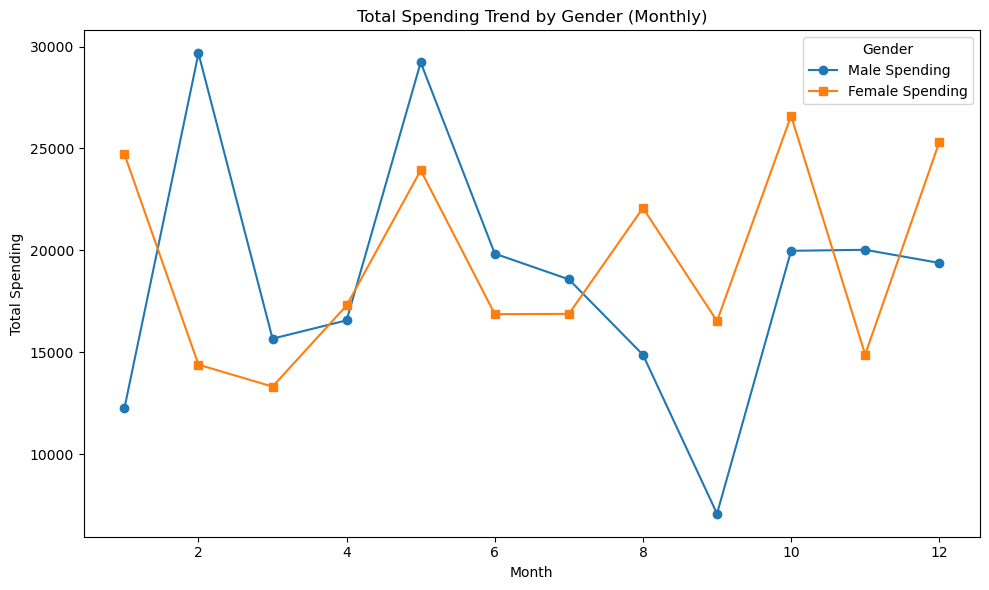

In [16]:
# Group by month (extract month from 'Date' column)
monthly_transactions = df.groupby(df['Date'].dt.month)


def calculate_gender_spending(group):
  """Calculates total spending for male and female customers within a group."""
  male_spending = group[group['Gender'] == 'Male']['Total Amount'].sum()
  female_spending = group[group['Gender'] == 'Female']['Total Amount'].sum()
  return pd.Series({'Male': male_spending, 'Female': female_spending})

# Apply the function to each group and store the result
gendered_spending = monthly_transactions.apply(calculate_gender_spending)

# Print results 
for month, gender_data in gendered_spending.iterrows():
  print(f"Month: {month}")
  print(f"  Male Spending: {gender_data['Male']:.2f}")
  print(f"  Female Spending: {gender_data['Female']:.2f}")
  print()  # Add a blank line between months

# Extract month labels and sales data
months = gendered_spending.index.to_list()
male_spending = gendered_spending['Male'].to_list()
female_spending = gendered_spending['Female'].to_list()

# Create the Lineplot
plt.figure(figsize=(10, 6))  
plt.plot(months, male_spending, marker='o', label='Male Spending')
plt.plot(months, female_spending, marker='s', label='Female Spending')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.legend(title = 'Gender')
plt.title('Total Spending Trend by Gender (Monthly)')
plt.tight_layout()
plt.show()

Using the table and lineplot, we can visually compare Spending patterns between Genders throughout the year.

Spending fluctuates for each Gender throughout the year

For instance, in May, Male spending is the highest at 29220.00, while Female spending is the highest in October at 26600.00.



Gender
Female    51.0
Male      49.0
Name: count, dtype: float64


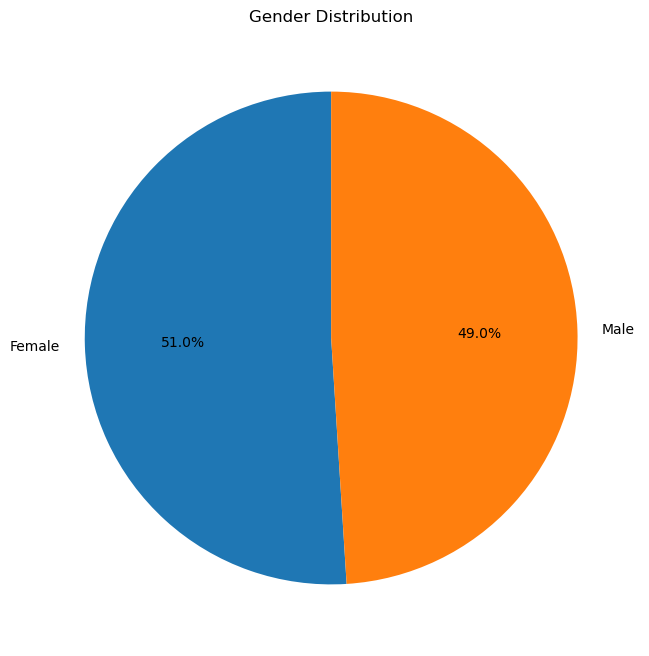

In [17]:
gender_distribution = df['Gender'].value_counts()
gender_distribution_percentage = (gender_distribution / gender_distribution.sum()) * 100
print(gender_distribution_percentage)

gender_distribution_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Gender Distribution')
plt.ylabel('')
plt.show()

HerE the percentage of female customers is more than male customers, based on the number of transactions done by each gender

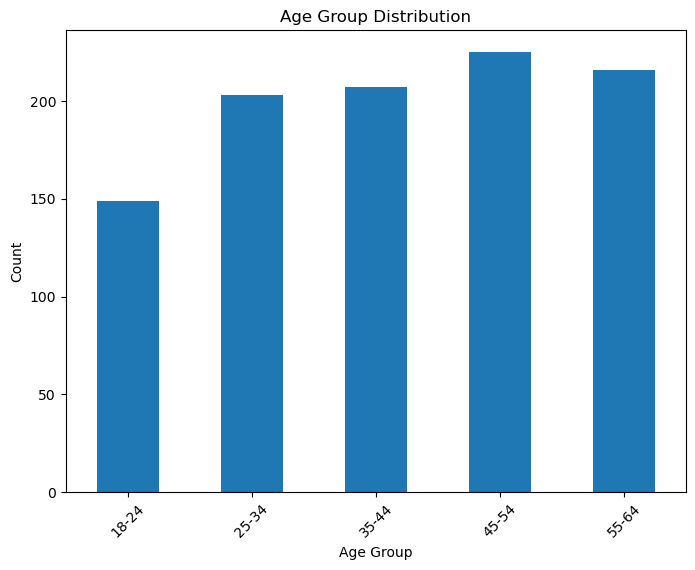

In [18]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = df['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The age group of 45-54 spends the most compared to other age groups, while the least are made by 18-24 year olds.

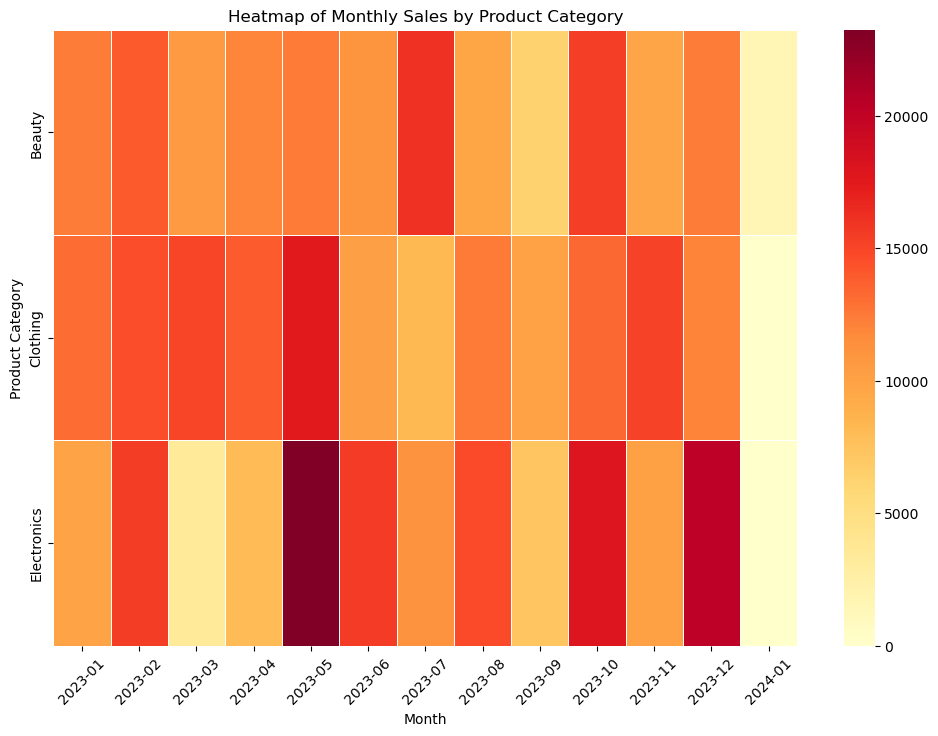

In [19]:
df['Month'] = df['Date'].dt.to_period('M')

pivot_table = df.pivot_table(
    index='Product Category',
    columns='Month',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)

# Heatmap of monthly sales
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title('Heatmap of Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()


Here we can see that in the month of May 2023, Electronics contributed the most on that month and also overall. Similarly, it contributed the least in the month of March 2023 if we exclude 2024.¶
Clothing showed a steady trend across the months, with July 2023 contributing the least and May the most. Beauty had the most sales in July and the least in September.
And in January 2024 had the least sales for all product categories

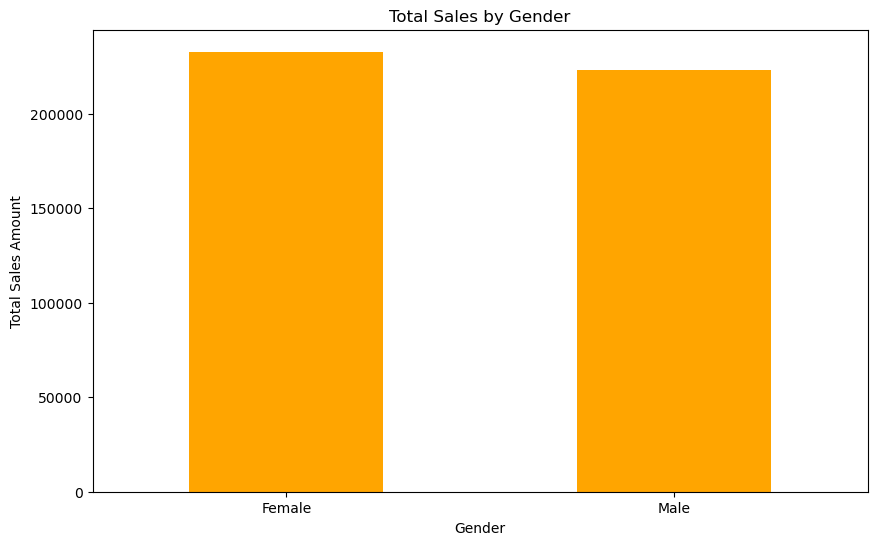

In [20]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
gender_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.show()

This barchart denotes the number of sales contributed by each gender, thus female population are repsonsible for most transactions and revenue.

C:\Users\nayak\AppData\Local\Temp\ipykernel_4488\232085975.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_product_sales = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()


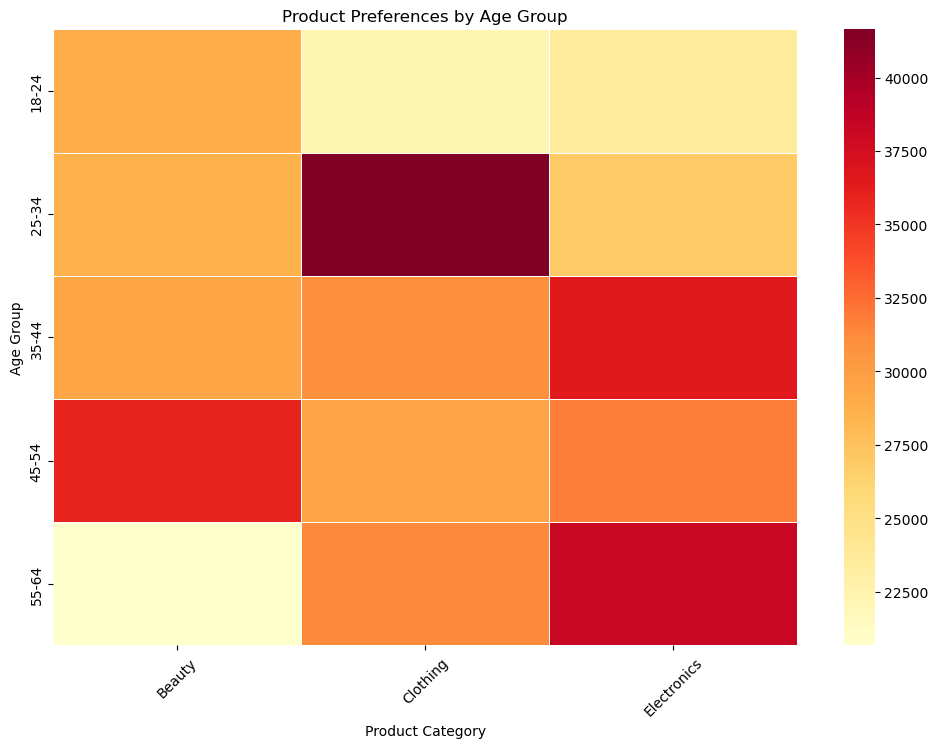

In [21]:
age_group_product_sales = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(age_group_product_sales, annot=False, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

This is a heatmap shows the agegroup and the the number of sales in each product category, thus the age group 25-34 spend the most among other age groups especially in clothing products.
Age group 55-64 spend the least in Beauty products. 

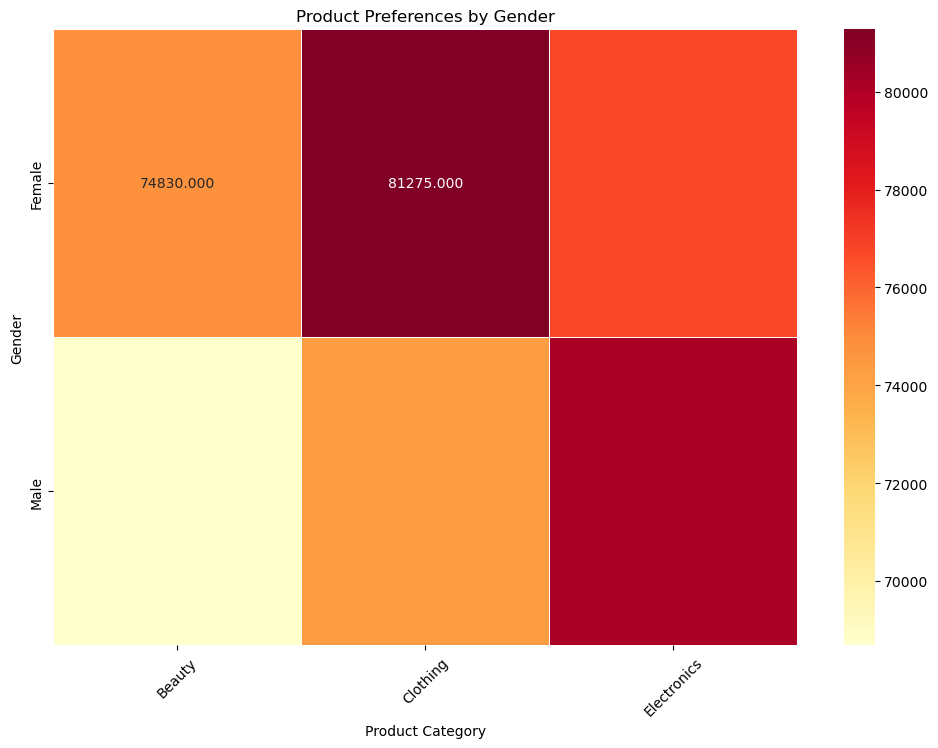

In [22]:
gender_product_sales = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(gender_product_sales, annot=True, fmt=".3f", cmap="YlOrRd", linewidths=.5)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.show()

This heatmap represents the gender that spends more in which product category, we can observe that the female population spends on an almost equal distribution in all product categories but spend most in Clothing products, while the male population spends more in electronics and least in Beauty products.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


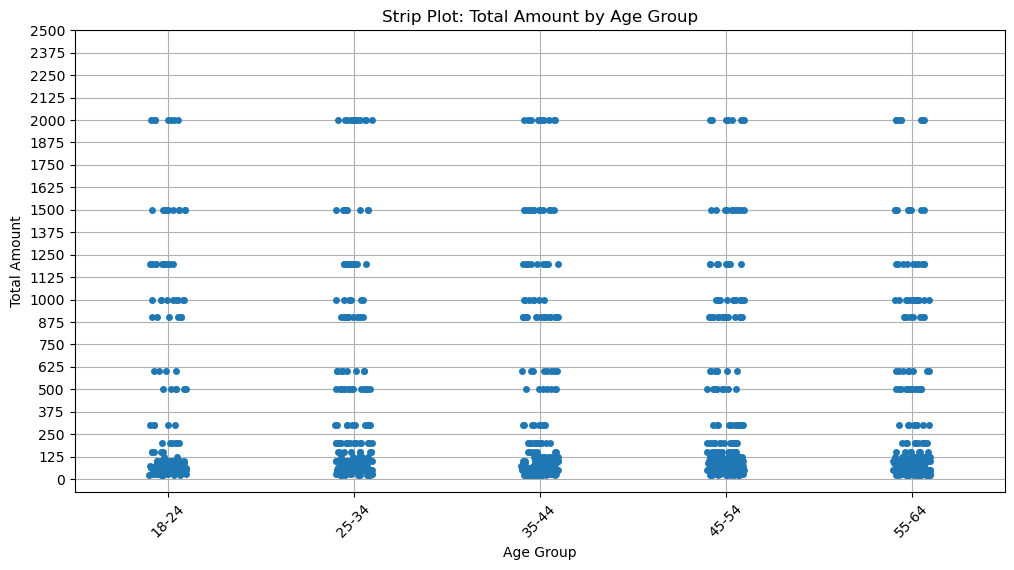

In [23]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Age Group', y='Total Amount', jitter=True)
plt.title('Strip Plot: Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.grid(True)
plt.yticks(range(0,2501,125))
plt.xticks(rotation=45)
plt.show()

This is also another way to present the amount spent by each age group, taking the whole population. 
The more clustered age group i.e 45=54 shows that they spend the most compared to other age groups.

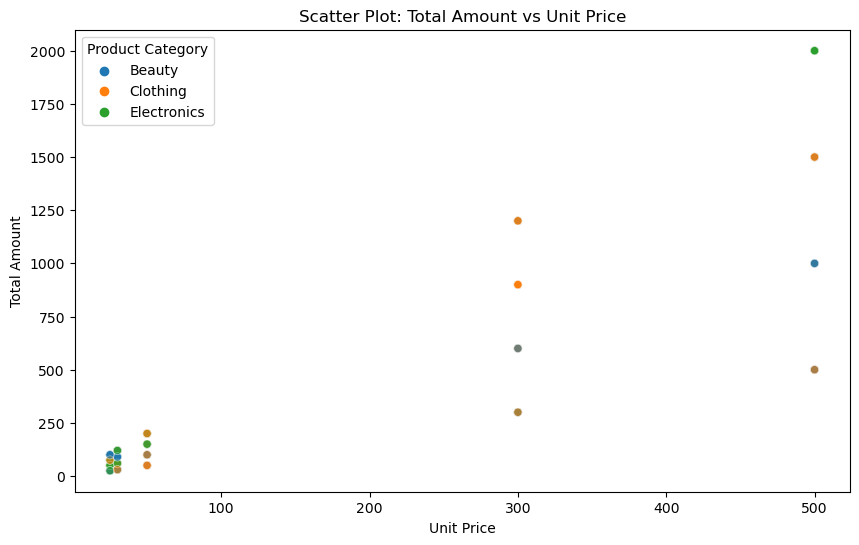

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Total Amount', hue='Product Category', alpha=0.6)
plt.title('Scatter Plot: Total Amount vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Amount')
plt.legend(title='Product Category', loc='upper left')
plt.show()


We can see that products which are priced in the range of 0-100, they are bought in more quantity although generate less revenue individually.

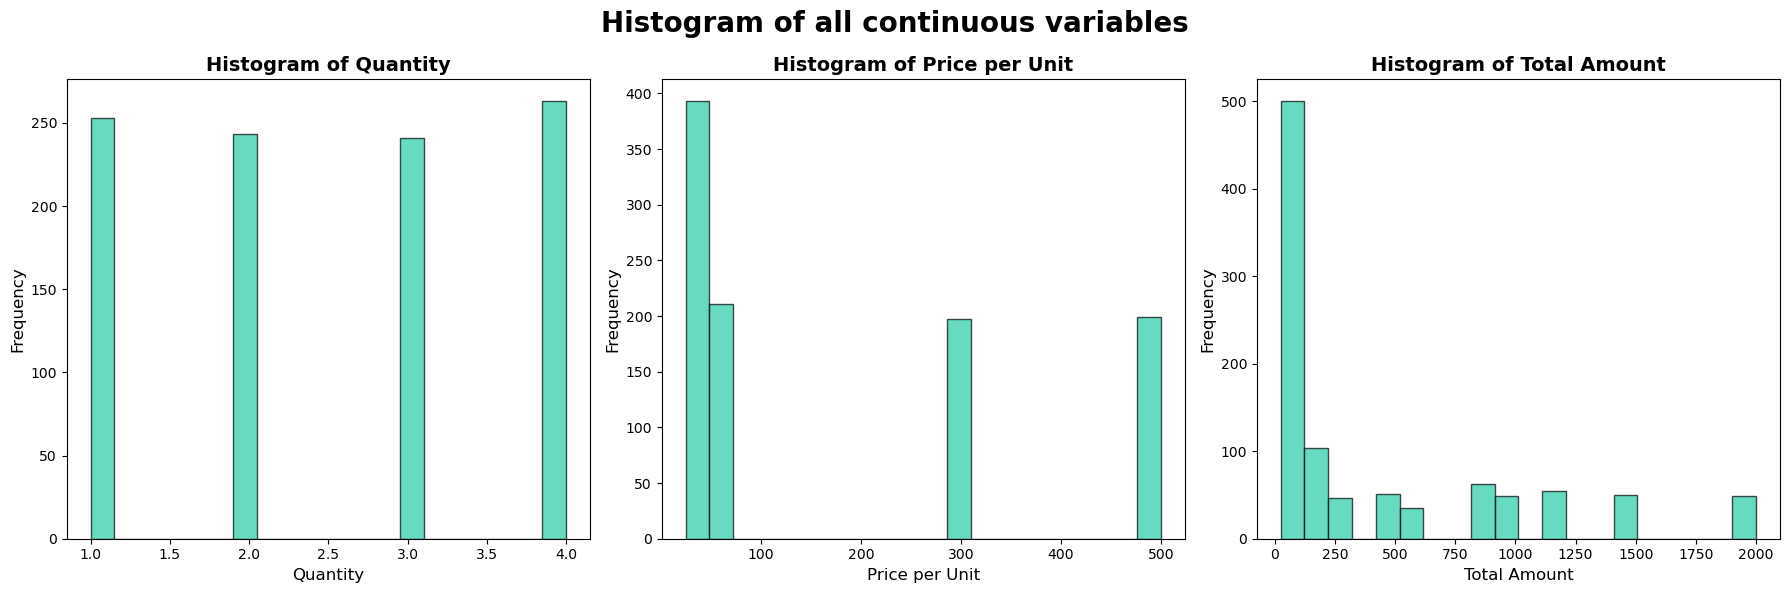

In [25]:
# Create the histogram plot
plt.figure(figsize=(18, 6))

# Plot the histograms
plt.subplot(131)
plt.hist(df['Quantity'], bins=20, color='#26cda9', edgecolor='black', alpha=0.7)
plt.title('Histogram of Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(132)
plt.hist(df['Price per Unit'], bins=20, color='#26cda9', edgecolor='black', alpha=0.7)
plt.title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
plt.xlabel('Price per Unit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(133)
plt.hist(df['Total Amount'], bins=20, color='#26cda9', edgecolor='black', alpha=0.7)
plt.title('Histogram of Total Amount', fontsize=14, fontweight='bold')
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of all continuous variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

This histogram shows the same as above code i.e what price of what quantity sells more;
Thus, it is observed that the products priced from 1-100 are bought more in quantity compared to other price groups, however, are not responsible the maximum revenue brought into the store.

Overall: We observe that,

While clothing is the best-selling category in terms of quantity, electronics generates the most revenue, closely followed by clothing.

Clothing: This category generates the most revenue for women. Men purchase more than women in terms of quantity but spend less on average in this category.

Electronic: This categoty men buy less than women in terms of quantity, but spend more on average in this category.

Beauty: This is the category with the lowest revenue and the lowest sales. In this category, revenue is higher for women than for men.

Based On Age:

The mean age of people visiting the shop is 41 and 75% of the shoppers are 53 years or below. The median of the age is 42.

The shoppers age distribution mostly lies between 29 and 53.

By observing the graph, we can see that the most shoppers are between the age groups 45-54, while the least are made by 18-24 year olds.

We can observe that people in the age group of 25-34 tend to buy a lot of products in the category of Clothing while people in the age group of 55-64 do not buy Beauty products as frequently.

For age group 18-24, Beauty products are more dominant as compared to Clothing and Electronics. Similarly, for age group 25-34, Beauty and Electronics are both equally bought and more than Clothing.

